In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# train test split
from sklearn.model_selection import train_test_split
# regression model
from sklearn.linear_model import LinearRegression
# regression analysis
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Data Cleaning

In [49]:
wage_data = pd.read_csv('data/usa_00006.csv.gz', compression="gzip")
wage_data

,REGION,SEX,AGE,MARST,RACE,RACED,HCOVANY,EDUC,EDUCD,DEGFIELD,DEGFIELDD,EMPSTAT,EMPSTATD,INCWAGE,INCWELFR,INCINVST,PWSTATE2,TRANTIME
0,32,2,85,5,8,801,2,7,71,0,0,3,30,0,0,0,0,0
1,32,1,51,5,1,100,2,6,64,0,0,3,30,12500,0,0,0,0
2,32,2,36,6,2,200,2,2,26,0,0,3,30,16400,0,0,0,0
3,32,1,74,6,2,200,2,0,2,0,0,3,30,0,0,0,0,0
4,32,1,49,4,1,100,1,7,71,0,0,3,30,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373373,41,1,33,6,1,100,2,10,101,11,1199,1,10,52000,0,0,56,10
3373374,41,2,27,6,1,100,2,10,101,23,2305,1,10,43000,0,0,56,45
3373375,41,1,1,6,1,100,2,0,1,0,0,0,0,999999,99999,999999,0,0
3373376,41,1,66,1,1,100,2,6,63,0,0,1,10,162000,0,0,56,10


In [50]:
wage_data = wage_data.drop(columns=['RACED', 'EDUCD','DEGFIELDD', 'EMPSTATD', 'PWSTATE2'])
wage_data

,REGION,SEX,AGE,MARST,RACE,HCOVANY,EDUC,DEGFIELD,EMPSTAT,INCWAGE,INCWELFR,INCINVST,TRANTIME
0,32,2,85,5,8,2,7,0,3,0,0,0,0
1,32,1,51,5,1,2,6,0,3,12500,0,0,0
2,32,2,36,6,2,2,2,0,3,16400,0,0,0
3,32,1,74,6,2,2,0,0,3,0,0,0,0
4,32,1,49,4,1,1,7,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373373,41,1,33,6,1,2,10,11,1,52000,0,0,10
3373374,41,2,27,6,1,2,10,23,1,43000,0,0,45
3373375,41,1,1,6,1,2,0,0,0,999999,99999,999999,0
3373376,41,1,66,1,1,2,6,0,1,162000,0,0,10


#### Data Code

##### Race Codes: 

1	White	
2	Black/African American	
3	American Indian or Alaska Native	
4	Chinese	
5	Japanese	
6	Other Asian or Pacific Islander	
7	Other race, nec	
8	Two major races	
9	Three or more major races

##### HCOVANY Codes: 

1	No health insurance coverage	
2	With health insurance coverage

##### EDUC codes:

00	N/A or no schooling	X
01	Nursery school to grade 4	X
02	Grade 5, 6, 7, or 8	X
03	Grade 9	X
04	Grade 10	X
05	Grade 11	X
06	Grade 12	X
07	1 year of college	X
08	2 years of college	X
09	3 years of college	·
10	4 years of college	X
11	5+ years of college	X
99	Missing


##### DEGFIELD Codes: 

00	N/A	X
11	Agriculture	X
13	Environment and Natural Resources	X
14	Architecture	X
15	Area, Ethnic, and Civilization Studies	X
19	Communications	X
20	Communication Technologies	X
21	Computer and Information Sciences	X
22	Cosmetology Services and Culinary Arts	X
23	Education Administration and Teaching	X
24	Engineering	X
25	Engineering Technologies	X
26	Linguistics and Foreign Languages	X
29	Family and Consumer Sciences	X
32	Law	X
33	English Language, Literature, and Composition	X
34	Liberal Arts and Humanities	X
35	Library Science	X
36	Biology and Life Sciences	X
37	Mathematics and Statistics	X
38	Military Technologies	X
40	Interdisciplinary and Multi-Disciplinary Studies (General)	X
41	Physical Fitness, Parks, Recreation, and Leisure	X
48	Philosophy and Religious Studies	X
49	Theology and Religious Vocations	X
50	Physical Sciences	X
51	Nuclear, Industrial Radiology, and Biological Technologies	X
52	Psychology	X
53	Criminal Justice and Fire Protection	X
54	Public Affairs, Policy, and Social Work	X
55	Social Sciences	X
56	Construction Services	X
57	Electrical and Mechanic Repairs and Technologies	X
58	Precision Production and Industrial Arts	·
59	Transportation Sciences and Technologies	X
60	Fine Arts	X
61	Medical and Health Sciences and Services	X
62	Business	X
64	History


##### PWSTATE2:

00	N/A	X
01	Alabama	X
02	Alaska	X
04	Arizona	X
05	Arkansas	X
06	California	X
08	Colorado	X
09	Connecticut	X
10	Delaware	X
11	District of Columbia	X
12	Florida	X
13	Georgia	X
15	Hawaii	X
16	Idaho	X
17	Illinois	X
18	Indiana	X
19	Iowa	X
20	Kansas	X
21	Kentucky	X
22	Louisiana	X
23	Maine	X
24	Maryland	X
25	Massachusetts	X
26	Michigan	X
27	Minnesota	X
28	Mississippi	X
29	Missouri	X
30	Montana	X
31	Nebraska	X
32	Nevada	X
33	New Hampshire	X
34	New Jersey	X
35	New Mexico	X
36	New York	X
37	North Carolina	X
38	North Dakota	X
39	Ohio	X
40	Oklahoma	X
41	Oregon	X
42	Pennsylvania	X
44	Rhode Island	X
45	South Carolina	X
46	South Dakota	X
47	Tennessee	X
48	Texas	X
49	Utah	X
50	Vermont	X
51	Virginia	X
53	Washington	X
54	West Virginia	X
55	Wisconsin	X
56	Wyoming	X

##### State group codes (UR samples)	
61	Maine-New Hampshire-Vermont	·
62	Massachusetts-Rhode Island	·
63	Minnesota-Iowa-Missouri-Kansas-Nebraska-S.Dakota-N.Dakota	·
64	Maryland-Delaware	·
65	Montana-Idaho-Wyoming	·
66	Utah-Nevada	·
67	Arizona-New Mexico	·
68	Alaska-Hawaii	·
72	Puerto Rico	X
73	U.S. outlying area	·
74	United States (1980 Puerto Rico samples)	·
80	Abroad	·
81	Europe	X
82	Eastern Asia	·
83	Other Asia, n.s. (2003-2005 ACS); South Central, South East, and Western Asia (2000-2002 ACS)	X
84	Mexico	X
85	Other Americas	X
86	Other, n.e.c.	X
87	Iraq	·
88	Canada	·
90	Confidential	·
99	Not reported

In [51]:
# Remove rows where INCWAGE is 999999 (N/A)
# revome rows where income is na
wage_data.dropna(subset=['INCWAGE'], inplace=True)
wage_data = wage_data[wage_data['INCWAGE'] != 999999]
wage_data

,REGION,SEX,AGE,MARST,RACE,HCOVANY,EDUC,DEGFIELD,EMPSTAT,INCWAGE,INCWELFR,INCINVST,TRANTIME
0,32,2,85,5,8,2,7,0,3,0,0,0,0
1,32,1,51,5,1,2,6,0,3,12500,0,0,0
2,32,2,36,6,2,2,2,0,3,16400,0,0,0
3,32,1,74,6,2,2,0,0,3,0,0,0,0
4,32,1,49,4,1,1,7,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373372,41,1,55,6,1,2,6,0,1,21800,0,0,13
3373373,41,1,33,6,1,2,10,11,1,52000,0,0,10
3373374,41,2,27,6,1,2,10,23,1,43000,0,0,45
3373376,41,1,66,1,1,2,6,0,1,162000,0,0,10


In [52]:
wage_data.describe()

,REGION,SEX,AGE,MARST,RACE,HCOVANY,EDUC,DEGFIELD,EMPSTAT,INCWAGE,INCWELFR,INCINVST,TRANTIME
count,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06
mean,2.839617e+01,1.513144e+00,4.975876e+01,3.123662e+00,2.414484e+00,1.921980e+00,7.418151e+00,1.414194e+01,1.855315e+00,3.521161e+04,4.859950e+01,3.015792e+03,1.224302e+01
std,1.027669e+01,4.998273e-01,1.974501e+01,2.240868e+00,2.509463e+00,2.682033e-01,2.467408e+00,2.257371e+01,9.777120e-01,6.538914e+04,6.935578e+02,2.496205e+04,2.030420e+01
min,1.100000e+01,1.000000e+00,1.600000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-3.000000e+03,0.000000e+00
25%,2.100000e+01,1.000000e+00,3.300000e+01,1.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.100000e+01,2.000000e+00,5.000000e+01,2.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00,0.000000e+00,1.000000e+00,9.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.300000e+01,2.000000e+00,6.600000e+01,6.000000e+00,2.000000e+00,2.000000e+00,1.000000e+01,2.400000e+01,3.000000e+00,5.000000e+04,0.000000e+00,0.000000e+00,2.000000e+01
max,4.200000e+01,2.000000e+00,9.700000e+01,6.000000e+00,9.000000e+00,2.000000e+00,1.100000e+01,6.400000e+01,3.000000e+00,7.910000e+05,3.000000e+04,4.680000e+05,1.580000e+02


#### Winsorize data 

In [53]:
def winsorize_series(series, lower_percentile=0.01, upper_percentile=0.99):
    lower_limit = series.quantile(lower_percentile)
    upper_limit = series.quantile(upper_percentile)
    return series.clip(lower=lower_limit, upper=upper_limit)

# Assuming your data is in a DataFrame named wage_data
# Explicitly use .loc to avoid SettingWithCopyWarning
wage_data = wage_data.copy()  # Ensure it's a standalone DataFrame
wage_data.loc[:, 'INCWAGE'] = winsorize_series(wage_data['INCWAGE'])

The below graph describes the wage = 0 distribution against age to decide if we will drop 0 wages. 

The result of the below graph indicates that there are more occurrences of 0 wages when the subject is less than 20 years old(in school) or when the subject is above 55 years old(retired maybe?) 

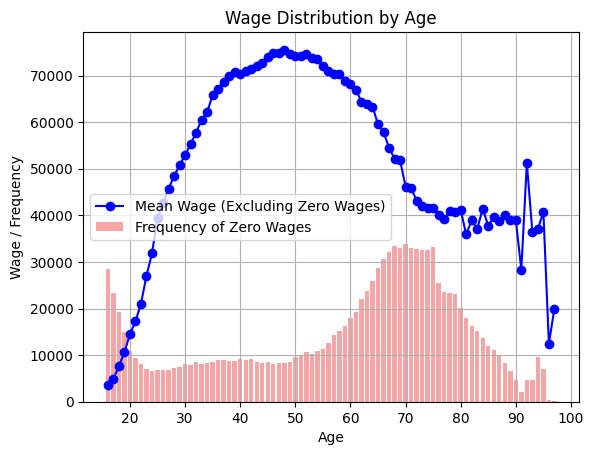

In [54]:
wage_zero_data = wage_data[wage_data['INCWAGE'] == 0].groupby('AGE')['INCWAGE'].count()

mean_wage_by_age = wage_data[wage_data['INCWAGE'] > 0].groupby('AGE')['INCWAGE'].mean()


plt.bar(wage_zero_data.index, wage_zero_data.values, color='lightcoral', alpha=0.7, label='Frequency of Zero Wages')

plt.plot(mean_wage_by_age.index, mean_wage_by_age.values, color='blue', marker='o', label='Mean Wage (Excluding Zero Wages)')

plt.title('Wage Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Wage / Frequency')
plt.legend()
plt.grid(True)
plt.show()

### Education data Grouping

In [27]:
## Educational attainment mapping
educ_mapping = {
    0: 'No_to_Grade_8',  # Includes codes 0, 1, 2, 99
    1: 'Grade_9_to_12',  # Includes codes 3, 4, 5, 6
    2: 'One_to_Two_College',  # Includes codes 7, 8
    3: 'Three_to_Four_College',  # Includes codes 9, 10
    4: 'Five_or_More_Years_College'  # Includes codes 11
}

educ_group_codes = {
    'No_to_Grade_8': [0, 1, 2, 99],
    'Grade_9_to_12': [3, 4, 5, 6],
    'One_to_Two_College': [7, 8],
    'Three_to_Four_College': [9, 10],
    'Five_or_More_Years_College': [11]
}

for group_name, codes in educ_group_codes.items():
    wage_data[group_name] = wage_data['EDUC'].isin(codes).astype(int)

wage_data = wage_data.drop(columns=['EDUC'])
wage_data

,REGION,SEX,AGE,MARST,RACE,HCOVANY,DEGFIELD,EMPSTAT,INCWAGE,INCWELFR,INCINVST,TRANTIME,No_to_Grade_8,Grade_9_to_12,One_to_Two_College,Three_to_Four_College,Five_or_More_Years_College
0,32,2,85,5,8,2,0,3,0,0,0,0,0,0,1,0,0
1,32,1,51,5,1,2,0,3,12500,0,0,0,0,1,0,0,0
2,32,2,36,6,2,2,0,3,16400,0,0,0,1,0,0,0,0
3,32,1,74,6,2,2,0,3,0,0,0,0,1,0,0,0,0
4,32,1,49,4,1,1,0,3,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373372,41,1,55,6,1,2,0,1,21800,0,0,13,0,1,0,0,0
3373373,41,1,33,6,1,2,11,1,52000,0,0,10,0,0,0,1,0
3373374,41,2,27,6,1,2,23,1,43000,0,0,45,0,0,0,1,0
3373376,41,1,66,1,1,2,0,1,162000,0,0,10,0,1,0,0,0


### Degree Field Mapping

In [59]:
degfield_mapping = {
    0: 'General_and_Undefined',  # Includes codes 0, 40
    1: 'STEM',  # Includes codes 11, 13, 14, 21, 24, 25, 36, 37, 50, 51, 52
    2: 'Humanities_Arts_and_Social_Sciences',  # Includes codes 15, 26, 29, 33, 34, 48, 49, 54, 55, 60, 64
    3: 'Business_Law_and_Communication',  # Includes codes 19, 20, 32, 62
    4: 'Vocational_Health_and_Education'  # Includes codes 22, 23, 35, 41, 56, 57, 59, 61, 38, 53
}

degfield_group_codes = {
    'General_and_Undefined': [0, 40],
    'STEM': [11, 13, 14, 21, 24, 25, 36, 37, 50, 51, 52],
    'Humanities_Arts_and_Social_Sciences': [15, 26, 29, 33, 34, 48, 49, 54, 55, 60, 64],
    'Business_Law_and_Communication': [19, 20, 32, 62],
    'Vocational_Health_and_Education': [22, 23, 35, 41, 56, 57, 59, 61, 38, 53]
}

for group_name, codes in degfield_group_codes.items():
    wage_data[group_name] = wage_data['DEGFIELD'].isin(codes).astype(int)

wage_data = wage_data.drop(columns=['DEGFIELD'])

In [60]:
wage_data

,REGION,SEX,AGE,MARST,RACE,HCOVANY,EMPSTAT,INCWAGE,INCWELFR,INCINVST,...,No_to_Grade_8,Grade_9_to_12,One_to_Two_College,Three_to_Four_College,Five_or_More_Years_College,General_and_Undefined,STEM,Humanities_Arts_and_Social_Sciences,Business_Law_and_Communication,Vocational_Health_and_Education
0,32,2,85,5,8,2,3,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,32,1,51,5,1,2,3,12500,0,0,...,0,1,0,0,0,1,0,0,0,0
2,32,2,36,6,2,2,3,16400,0,0,...,1,0,0,0,0,1,0,0,0,0
3,32,1,74,6,2,2,3,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,32,1,49,4,1,1,3,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373372,41,1,55,6,1,2,1,21800,0,0,...,0,1,0,0,0,1,0,0,0,0
3373373,41,1,33,6,1,2,1,52000,0,0,...,0,0,0,1,0,0,1,0,0,0
3373374,41,2,27,6,1,2,1,43000,0,0,...,0,0,0,1,0,0,0,0,0,1
3373376,41,1,66,1,1,2,1,162000,0,0,...,0,1,0,0,0,1,0,0,0,0


### Race Mapping

In [62]:
race_mapping = {
    1: 'White',
    2: 'Black_African_American',
    3: 'American_Indian_Alaska_Native',
    4: 'Chinese',
    5: 'Japanese',
    6: 'Other_Asian_Pacific_Islander',
    7: 'Other_Race_nec',
    8: 'Two_Major_Races',
    9: 'Three_or_More_Major_Races'
}

for code, category in race_mapping.items():
    wage_data[category] = (wage_data['RACE'] == code).astype(int)

wage_data = wage_data.drop(columns=['RACE'])
wage_data
                           

,REGION,SEX,AGE,MARST,HCOVANY,EMPSTAT,INCWAGE,INCWELFR,INCINVST,TRANTIME,...,Vocational_Health_and_Education,White,Black_African_American,American_Indian_Alaska_Native,Chinese,Japanese,Other_Asian_Pacific_Islander,Other_Race_nec,Two_Major_Races,Three_or_More_Major_Races
0,32,2,85,5,2,3,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,32,1,51,5,2,3,12500,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,32,2,36,6,2,3,16400,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,32,1,74,6,2,3,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,32,1,49,4,1,3,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373372,41,1,55,6,2,1,21800,0,0,13,...,0,1,0,0,0,0,0,0,0,0
3373373,41,1,33,6,2,1,52000,0,0,10,...,0,1,0,0,0,0,0,0,0,0
3373374,41,2,27,6,2,1,43000,0,0,45,...,1,1,0,0,0,0,0,0,0,0
3373376,41,1,66,1,2,1,162000,0,0,10,...,0,1,0,0,0,0,0,0,0,0


In [63]:
'''
empstat_mapping = {
    0: 'No Employment Data',  # Not Applicable
    1: 'Employed',
    2: 'Unemployed',
    3: 'Not_in_Labor_Force'
}

for code, category in empstat_mapping.items():
    wage_data[category] = (wage_data['EMPSTAT'] == code).astype(int)
'''
wage_data['Employed'] = (wage_data['EMPSTAT'] == 1).astype(int)
wage_data = wage_data.drop(columns=['EMPSTAT'])

### Sex mapping

In [64]:
# Map SEX values to binary: 1 for Male, 0 for Female
wage_data['SEX'] = wage_data['SEX'].map({1: 1, 2: 0})

### Health insurance mapping

In [65]:
# Map HCOVANY values to binary: 1 for 'With health insurance coverage', 0 for 'No health insurance coverage'
wage_data['HCOVANY'] = wage_data['HCOVANY'].map({1: 0, 2: 1})

### Marriage Data mapping

In [66]:
# Define the mapping for MARST categories
marst_mapping = {
    1: 'Married_Spouse_Present',
    2: 'Married_Spouse_Absent',
    3: 'Separated',
    4: 'Divorced',
    5: 'Widowed',
    6: 'Never_Married_Single'
}

for code, status in marst_mapping.items():
    wage_data[status] = (wage_data['MARST'] == code).astype(int)

wage_data = wage_data.drop(columns=['MARST'])

In [67]:
# Define the mapping for REGION categories
region_mapping = {
    11: 'New_England_Division',
    12: 'Middle_Atlantic_Division',
    21: 'East_North_Central_Division',
    22: 'West_North_Central_Division',
    31: 'South_Atlantic_Division',
    32: 'East_South_Central_Division',
    33: 'West_South_Central_Division',
    41: 'Mountain_Division',
    42: 'Pacific_Division',
}

for code, division in region_mapping.items():
    wage_data[division] = (wage_data['REGION'] == code).astype(int)

wage_data = wage_data.drop(columns=['REGION'])

In [68]:
int64_columns = wage_data.select_dtypes(include=['int64']).columns
wage_data[int64_columns] = wage_data[int64_columns].astype('int32')

In [69]:
wage_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2809390 entries, 0 to 3373377
Data columns (total 42 columns):
 #   Column                               Dtype
---  ------                               -----
 0   SEX                                  int32
 1   AGE                                  int32
 2   HCOVANY                              int32
 3   INCWAGE                              int32
 4   INCWELFR                             int32
 5   INCINVST                             int32
 6   TRANTIME                             int32
 7   No_to_Grade_8                        int32
 8   Grade_9_to_12                        int32
 9   One_to_Two_College                   int32
 10  Three_to_Four_College                int32
 11  Five_or_More_Years_College           int32
 12  General_and_Undefined                int32
 13  STEM                                 int32
 14  Humanities_Arts_and_Social_Sciences  int32
 15  Business_Law_and_Communication       int32
 16  Vocational_Health_and_E

## Run Simple Regression

In [70]:
# Defining x and y variables

wage_data['LOG_INCWAGE'] = np.log(wage_data['INCWAGE'] + 1) # +1 to avoid log(0)
y = wage_data['LOG_INCWAGE']
x = wage_data.drop(['INCWAGE','LOG_INCWAGE'],axis=1)

# Run a simple linear model 

model = sm.OLS(y, x).fit()

# Output the summary of the regression model
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:            LOG_INCWAGE   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                 2.217e+05
Date:                Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:26:44   Log-Likelihood:            -6.7413e+06
No. Observations:             2809390   AIC:                         1.348e+07
Df Residuals:                 2809353   BIC:                         1.348e+07
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
SE

In [73]:
wage_data

,SEX,AGE,HCOVANY,INCWAGE,INCWELFR,INCINVST,TRANTIME,No_to_Grade_8,Grade_9_to_12,One_to_Two_College,...,New_England_Division,Middle_Atlantic_Division,East_North_Central_Division,West_North_Central_Division,South_Atlantic_Division,East_South_Central_Division,West_South_Central_Division,Mountain_Division,Pacific_Division,LOG_INCWAGE
0,0,85,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0.000000
1,1,51,1,12500,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,9.433564
2,0,36,1,16400,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,9.705098
3,1,74,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0.000000
4,1,49,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373372,1,55,1,21800,0,0,13,0,1,0,...,0,0,0,0,0,0,0,1,0,9.989711
3373373,1,33,1,52000,0,0,10,0,0,0,...,0,0,0,0,0,0,0,1,0,10.859018
3373374,0,27,1,43000,0,0,45,0,0,0,...,0,0,0,0,0,0,0,1,0,10.668979
3373376,1,66,1,162000,0,0,10,0,1,0,...,0,0,0,0,0,0,0,1,0,11.995358


In [72]:
'''
Splitting the training set and test set, randomly create 92 splits, test on 20% of the data.
'''
# define predictor and response variables

y = wage_data['LOG_INCWAGE']
x = wage_data.drop(['LOG_INCWAGE', 'INCWAGE', 'No Employment Data'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=92)

KeyError: "['No Employment Data'] not found in axis"

In [42]:
## Linear regression 

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# run linear regression
model = sm.OLS(y_train, X_train).fit()

# view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LOG_INCWAGE   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                 2.764e+05
Date:                Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:11:27   Log-Likelihood:            -5.3610e+06
No. Observations:             2247512   AIC:                         1.072e+07
Df Residuals:                 2247487   BIC:                         1.072e+07
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [43]:
# Prediction 

y_pred = model.predict(sm.add_constant(X_test))

np.mean(np.absolute(y_pred - y_test))

# Mean of absolute error

np.float64(1.5441509764332477)

## Forward Selection

In [44]:
# 'n_features_to_select': “auto”, int or float, default=’auto’
# If "auto", the behaviour depends on the 'tol' parameter:
# if tol is not None, then features are selected until the score improvement does not exceed 'tol'.
# otherwise, half of the features are selected.

# If the score is not incremented by at least 'tol' between two consecutive feature additions or removals, 
# stop adding or removing. 'tol' is enabled only when 'n_features_to_select' is "auto".

sfs = SequentialFeatureSelector(LinearRegression(),
                                 direction='forward',
                                 cv=None,
                                 n_features_to_select=10)  # Limit to top 10 features

sfs.fit(X_train, y_train)


# shape is from numpy and returns the shape of the array 

sfs.transform(X_train).shape

(2247512, 10)

In [45]:
sfs

SequentialFeatureSelector(cv=None, estimator=LinearRegression(),
                          n_features_to_select=10)

In [46]:
# Features selected from Forward Stepwise Selection Model

X_train.loc[:,sfs.get_support()]

,SEX,AGE,HCOVANY,TRANTIME,One_to_Two_College,Five_or_More_Years_College,General_and_Undefined,Humanities_Arts_and_Social_Sciences,Employed,Not_in_Labor_Force
3276207,0,29,1,8,1,0,1,0,1,0
2218525,1,62,1,0,0,0,1,0,0,1
40906,0,58,1,0,1,0,1,0,0,1
2194288,1,83,1,0,1,0,1,0,0,1
2381987,0,39,1,25,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
916693,1,24,1,3,0,0,1,0,1,0
1822082,0,74,1,0,0,1,0,0,0,1
283362,0,28,1,45,1,0,1,0,1,0
2547387,1,60,1,50,0,0,0,0,1,0


In [71]:
# Adding a constant to the predictor values

forward_x = sfs.transform(X_train)

# Run a linear regression model

model = sm.OLS(y_train, forward_x).fit()

# view model summary

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            LOG_INCWAGE   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                          1.799e+06
Date:                Tue, 19 Nov 2024   Prob (F-statistic):                        0.00
Time:                        17:51:38   Log-Likelihood:                     -5.3874e+06
No. Observations:             2247512   AIC:                                  1.077e+07
Df Residuals:                 2247502   BIC:                                  1.077e+07
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Backward Selection

In [77]:
sbs = SequentialFeatureSelector(LinearRegression(),
                                direction='backward',
                                cv=None, n_features_to_select=10)
sbs.fit(X_train, y_train)

sbs.transform(X_train).shape

(2247512, 10)

In [87]:
X_train.loc[:,sbs.get_support()]

,SEX,AGE,HCOVANY,INCWELFR,TRANTIME,General_and_Undefined,Humanities_Arts_and_Social_Sciences,Other_Race_nec,Unemployed,Not_in_Labor_Force
3276207,0,29,1,0,8,1,0,0,0,0
2218525,1,62,1,0,0,1,0,0,0,1
40906,0,58,1,0,0,1,0,0,0,1
2194288,1,83,1,0,0,1,0,0,0,1
2381987,0,39,1,0,25,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
916693,1,24,1,0,3,1,0,0,0,0
1822082,0,74,1,0,0,0,0,0,0,1
283362,0,28,1,0,45,1,0,0,0,0
2547387,1,60,1,0,50,0,0,0,0,0


In [90]:
#add constant to predictor variables
backward_x = sbs.transform(X_train)

#fit linear regression model
model = sm.OLS(y_train, backward_x).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            LOG_INCWAGE   R-squared (uncentered):                   0.820
Model:                            OLS   Adj. R-squared (uncentered):              0.820
Method:                 Least Squares   F-statistic:                          1.022e+06
Date:                Tue, 19 Nov 2024   Prob (F-statistic):                        0.00
Time:                        19:00:52   Log-Likelihood:                     -5.9318e+06
No. Observations:             2247512   AIC:                                  1.186e+07
Df Residuals:                 2247502   BIC:                                  1.186e+07
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Ridge regression

In [107]:
X_train_std = StandardScaler().fit_transform(X_train)

clf = Ridge(alpha=0) ## alpha is = lambda in python(avoid confusion w lambda functions)

clf.fit(X_train_std,y_train)

print(clf.coef_)

[-1.31670791e+12  1.06585316e-01 -4.11791314e-01  1.12025903e-01
 -4.18961671e-02 -2.57141171e-02  1.37752359e-01 -4.17671862e+12
 -7.41613348e+11  4.95048813e+12  8.15393514e+12  2.02671227e+11
 -5.28937119e+09 -3.32264498e+09 -2.97007088e+09 -3.00773293e+09
 -3.01532564e+09  7.15170532e+11  4.38305879e+11  1.67900928e+11
  1.91981147e+11  8.06748919e+10  3.17675890e+11  3.47972337e+11
  4.44399550e+11  1.20297977e+11  2.08312510e+11  6.31761349e+10
  2.06889033e+11]


In [110]:
# Statistics of standardized data
pd.DataFrame(X_train_std).describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,2247512.0,2.247512e+06,2.247512e+06,2.247512e+06,2.247512e+06,2.247512e+06,2.247512e+06,2247512.0,2247512.0,2247512.0,...,2.247512e+06,2.247512e+06,2.247512e+06,2.247512e+06,2.247512e+06,2.247512e+06,2.247512e+06,2.247512e+06,2.247512e+06,2.247512e+06
mean,0.0,-5.750702e-17,-1.812783e-17,-2.004368e-17,-1.028108e-17,2.078346e-17,-3.420704e-17,0.0,0.0,0.0,...,8.289358e-18,-3.241132e-17,1.060671e-18,-5.094541e-17,-8.221070e-17,2.259340e-17,-8.352587e-18,4.451025e-17,-7.462003e-17,-2.901591e-17
std,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,0.0,0.0,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.0,-9.737488e-01,-1.710362e+00,-3.436863e+00,-6.999127e-02,-2.407242e-01,-6.028069e-01,0.0,0.0,0.0,...,-1.106100e-01,-1.269589e-01,-5.265029e-02,-2.164344e-01,-2.394520e-01,-3.185774e-01,-7.877808e-02,-1.129819e+00,-1.540890e-01,-8.441341e-01
25%,0.0,-9.737488e-01,-8.493167e-01,2.909630e-01,-6.999127e-02,-1.206598e-01,-6.028069e-01,0.0,0.0,0.0,...,-1.106100e-01,-1.269589e-01,-5.265029e-02,-2.164344e-01,-2.394520e-01,-3.185774e-01,-7.877808e-02,-1.129819e+00,-1.540890e-01,-8.441341e-01
50%,0.0,-9.737488e-01,1.172822e-02,2.909630e-01,-6.999127e-02,-1.206598e-01,-6.028069e-01,0.0,0.0,0.0,...,-1.106100e-01,-1.269589e-01,-5.265029e-02,-2.164344e-01,-2.394520e-01,-3.185774e-01,-7.877808e-02,8.850973e-01,-1.540890e-01,-8.441341e-01
75%,0.0,1.026959e+00,8.221234e-01,2.909630e-01,-6.999127e-02,-1.206598e-01,3.818873e-01,0.0,0.0,0.0,...,-1.106100e-01,-1.269589e-01,-5.265029e-02,-2.164344e-01,-2.394520e-01,-3.185774e-01,-7.877808e-02,8.850973e-01,-1.540890e-01,1.184646e+00
max,0.0,1.026959e+00,2.392264e+00,2.909630e-01,4.322503e+01,1.860940e+01,7.176277e+00,0.0,0.0,0.0,...,9.040773e+00,7.876565e+00,1.899325e+01,4.620337e+00,4.176203e+00,3.138955e+00,1.269389e+01,8.850973e-01,6.489754e+00,1.184646e+00


In [113]:
clf = Ridge(alpha=0)
clf.fit(X_train_std,y_train)
print(clf.coef_)

[-1.31670791e+12  1.06585316e-01 -4.11791314e-01  1.12025903e-01
 -4.18961671e-02 -2.57141171e-02  1.37752359e-01 -4.17671862e+12
 -7.41613348e+11  4.95048813e+12  8.15393514e+12  2.02671227e+11
 -5.28937119e+09 -3.32264498e+09 -2.97007088e+09 -3.00773293e+09
 -3.01532564e+09  7.15170532e+11  4.38305879e+11  1.67900928e+11
  1.91981147e+11  8.06748919e+10  3.17675890e+11  3.47972337e+11
  4.44399550e+11  1.20297977e+11  2.08312510e+11  6.31761349e+10
  2.06889033e+11]


In [116]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Choose the best lambda using cross validation

# We first define a function evaluate_lambda based on three arguments 

def evaluate_lambda(X, y, lmd):
    # evaluate model - MAE
    model = Ridge(alpha=lmd)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=10)
    # force scores to be positive
    return np.absolute(scores)

# This creates a DataFrame with two columns: 'lambda' for the lambda values and 'MAE' to store the mean absolute error.

lambda_score_ridge = pd.DataFrame({'lambda':range(1000),'MAE':0}) ## MAE = mean absolute error

# This loop iterates over lambda values from 0 to 999 (1000 in total).

# For each lambda value, it evaluates the mean absolute error (MAE) using the evaluate_lambda function and stores the result in the DataFrame lambda_score_ridge.

for i in range(1000):
    lambda_score_ridge.loc[i,'MAE'] = evaluate_lambda(X_train_std,y_train,i).mean()

C:\Users\Michael\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Michael\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Michael\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py", line 1134, in fit
    return super().fit(X, y, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Michael\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py", li

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Michael\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Michael\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py", line 1134, in fit
    return super().fit(X, y, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Michael\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py", line 866, in fit
    X, y, X_offset, y_offset, X_scale = _preprocess_data(
                                        ^^^^^^^^^^^^^^^^^
  File "C:\Users\Michael\anaconda3\Lib\site-packages\sklearn\linear_model\_base.py", line 230, in _preprocess_data
    X = check_array(X, copy=copy, accept_sparse=["csr", "csc"], dtype=FLOAT_DTYPES)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Michael\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 950, in check_array
    array = _asarray_with_order(
            ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Michael\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 186, in _asarray_with_order
    return xp.asarray(array, copy=copy)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Michael\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 73, in asarray
    return numpy.array(x, copy=True, dtype=dtype)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 448. MiB for an array with shape (2022760, 29) and data type float64

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Michael\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Michael\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py", line 1134, in fit
    return super().fit(X, y, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Michael\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py", line 866, in fit
    X, y, X_offset, y_offset, X_scale = _preprocess_data(
                                        ^^^^^^^^^^^^^^^^^
  File "C:\Users\Michael\anaconda3\Lib\site-packages\sklearn\linear_model\_base.py", line 230, in _preprocess_data
    X = check_array(X, copy=copy, accept_sparse=["csr", "csc"], dtype=FLOAT_DTYPES)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Michael\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 950, in check_array
    array = _asarray_with_order(
            ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Michael\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 186, in _asarray_with_order
    return xp.asarray(array, copy=copy)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Michael\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 73, in asarray
    return numpy.array(x, copy=True, dtype=dtype)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 448. MiB for an array with shape (2022761, 29) and data type float64


In [ ]:
# best lambda

lambda_score_ridge.loc[lambda_score_ridge.MAE.idxmin(),'lambda']